In [1]:
import pandas as pd
from process_datas import get_X_y, scaler_data, encode_names


data = pd.read_csv('data-15 genres-final.csv')
X, y, groups = get_X_y(data)
X = scaler_data(X)
y, _ = encode_names(y)

In [2]:
from classifier import *


Xdf = pd.DataFrame(X)
ydf = pd.DataFrame(y)

keras = Keras()
_, _, _, history = keras.evaluate(Xdf, ydf, groups)

2022-06-30 01:06:57.066373: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-30 01:06:57.090077: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-30 01:06:57.129822: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1600)              32000     
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 800)               1280800   
_________________________________________________________________
dropout_1 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                6

2022-06-30 01:06:59.818894: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-30 01:06:59.955883: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1600000000 Hz


In [ ]:
import matplotlib.pyplot as plt
from lc import plot_learning_curve


naive_bayer = GaussianNB()
id3 = DecisionTreeClassifier(criterion='entropy')
id3_r = RandomForestClassifier (criterion='entropy')
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
svm = SVC(kernel='rbf', decision_function_shape='ovo', class_weight='balanced')

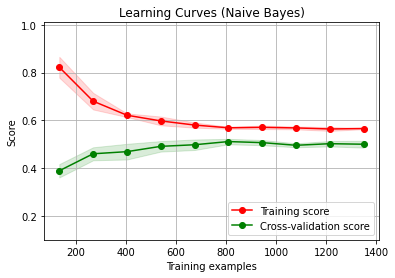

In [ ]:
plot_learning_curve(naive_bayer, "Learning Curves (Naive Bayes)", X, y, ylim=(0.1, 1.01), cv=StratifiedShuffleSplit(n_splits=3))
plt.show()

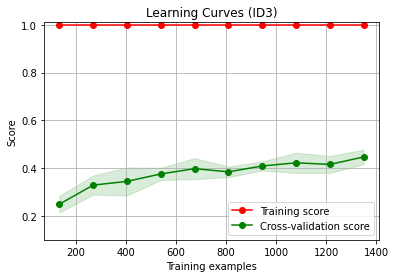

In [ ]:
plot_learning_curve(id3, "Learning Curves (ID3)", X, y, ylim=(0.1, 1.01), cv=StratifiedShuffleSplit(n_splits=3))
plt.show()

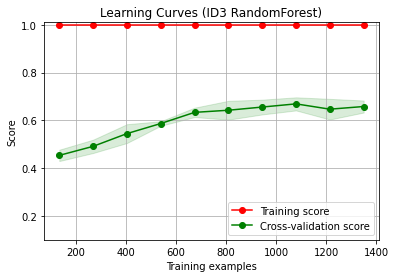

In [ ]:
plot_learning_curve(id3_r, "Learning Curves (ID3 RandomForest)", X, y, ylim=(0.1, 1.01), cv=StratifiedShuffleSplit(n_splits=3))
plt.show()

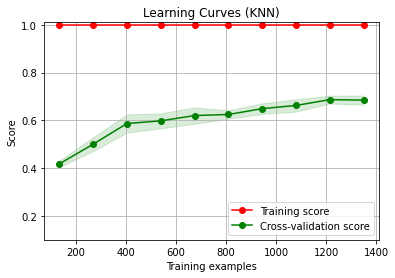

In [ ]:
plot_learning_curve(knn, "Learning Curves (KNN)", X, y, ylim=(0.1, 1.01), cv=StratifiedShuffleSplit(n_splits=3))
plt.show()

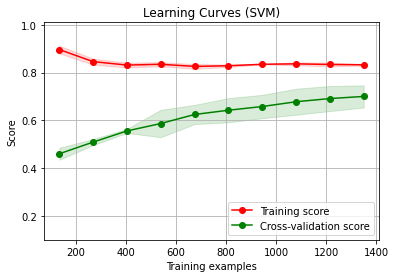

In [ ]:
plot_learning_curve(svm, "Learning Curves (SVM)", X, y, ylim=(0.1, 1.01), cv=StratifiedShuffleSplit(n_splits=3))
plt.show()

In [ ]:
# Learning Curve Keras Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()
                

NameError: name 'history' is not defined

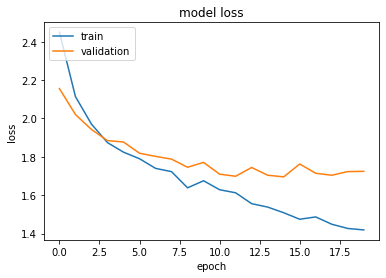

In [ ]:
# Learning Curve Keras Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()